In [10]:
import tensorflow as tf
print(tf.__version__)
import os
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from numpy.random import seed
import matplotlib.ticker as ticker
import matplotlib.lines as mlines

try:
    df = pd.read_csv('Data.csv', header=[0, 1])
    bounds = pd.read_csv('Bounds.csv', header=0)
    ubounds =  np.array(bounds.iloc[0].values)
    lbounds =  np.array(bounds.iloc[1].values)
    header_names = [col[0] for col in df.columns]
    header_names = header_names[1:-1]
    df.columns = df.columns.map(' '.join)
    df.index = pd.to_datetime(df['Date time time'], format='%d/%m/%Y %H:%M')
except FileNotFoundError as e:
    print(f"FileNotFoundError: {e} - The specified file was not found.")
except KeyError as e:
    print(f"KeyError: {e} - 'Date Time' column not found in the DataFrame.")
except ValueError as e:
    print(f"ValueError: {e} - Failed to convert datetime strings. Check the format parameter.")

#plot_check = df['Q tot MW']
#plot_check.plot()
df = df.drop('Date time time', axis=1)
time_differences = df.index.to_series().diff().dt.total_seconds() / 60
time_resolution = time_differences.median()
#print(ubounds)
print(header_names)
df

2.16.1
['C.1.0.TT034', 'C.1.0.LT021', 'C.1.1.TT030', 'C.1.2.TT031', 'C.1.3.TT032', 'C.1.4.TT033', 'C.2.0.TT044', 'C.2.0.LT022', 'C.2.1.TT040', 'C.2.2.TT041', 'C.2.3.TT042', 'C.2.4.TT043', 'C.3.0.TT054', 'C.3.0.LT023', 'C.3.1.TT050', 'C.3.2.TT051', 'C.3.3.TT052', 'C.3.4.TT053', 'C.4.0.TT064', 'C.4.0.LT024', 'C.4.1.TT060', 'C.4.2.TT061', 'C.4.3.TT062', 'C.4.4.TT063', 'C.5.0.TT074', 'C.5.0.LT025', 'C.5.1.TT070', 'C.5.2.TT071', 'C.5.3.TT072', 'C.5.4.TT073', 'C.6.0.TT084', 'C.6.0.LT026', 'C.6.1.TT080', 'C.6.2.TT081', 'C.6.3.TT082', 'C.6.4.TT083', 'A.1.1.TT006', 'A.1.1.TT005', 'A.1.1.FT003', 'B.1.1.LT010', 'A.1.2.TT012', 'A.1.2.TT011', 'A.1.2.FT006', 'B.1.2.LT011', 'IK1rPAR01', 'IK1rPAR02', 'B.1.1.K021.AKH', 'IK2rPAR01', 'IK2rPAR02', 'B.1.2.K022.AKH', 'Q tot', 'COP', 'El tot', 'A.1.1.TT006', 'A.1.1.TT005', 'A.1.2.TT012', 'A.1.2.TT011', 'T out', 'B.1.0.PT010', 'B.1.0.LT012', 'T_evap 1', 'T_evap 2', 'T_cond 1', 'T_cond 2', 'T_evap avg', 'T_cond avg', 'COP2', 'DT', 'UA', 'RH', 'DP', 'p', 'w spe

C:\Users\AttilaSulyokViegandM\AppData\Local\Temp\ipykernel_29080\1313761817.py:14: DtypeWarning: Columns (61,62,63,64,65,66,68,69) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data.csv', header=[0, 1])


,C.1.0.TT034 °C,C.1.0.LT021 %,C.1.1.TT030 °C,C.1.2.TT031 °C,C.1.3.TT032 °C,C.1.4.TT033 °C,C.2.0.TT044 °C,C.2.0.LT022 %,C.2.1.TT040 °C,C.2.2.TT041 °C,...,w speed m/s,FD1 1/0,FD2 1/0,FD3 1/0,FD4 1/0,FD5 1/0,FD6 1/0,COP norm 1/0,DT norm 1/0,Norm op2 1/0
Date time time,,,,,,,,,,,,,,,,,,,,,
2023-09-01 00:00:00,13.640,2.250,13.620,13.540,13.720,14.040,14.200,2.120,13.540,13.540,...,1.7,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2023-09-01 00:10:00,13.580,2.250,13.500,13.460,13.610,13.970,14.150,2.120,13.440,13.460,...,1.7,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2023-09-01 00:20:00,13.360,2.250,13.300,13.230,13.450,13.770,14.100,2.120,13.220,13.220,...,1.7,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2023-09-01 00:30:00,13.130,2.130,13.060,12.970,13.240,13.540,14.010,2.120,12.970,12.970,...,1.7,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2023-09-01 00:40:00,13.100,2.110,12.990,12.900,13.090,13.400,13.950,2.120,12.840,12.870,...,1.7,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-15 07:40:00,9.398,25.868,-0.762,-0.812,-1.332,-0.470,11.922,14.144,-0.912,-0.756,...,3.3,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1
2024-03-15 07:50:00,9.394,26.430,-1.092,-1.106,-1.600,-0.762,11.818,12.680,-1.280,-1.106,...,3.3,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1
2024-03-15 08:00:00,9.402,33.300,-0.556,-0.604,-1.074,-0.304,12.824,15.772,-0.686,-0.574,...,3.4,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1


In [2]:
start_dates = []
end_dates = []
start_test_dates = []
end_test_dates = []
start_test_date = None
end_test_date = None
start_date = None
end_date = None
WINDOW_SIZE = 30
TRAIN_OFFSET = 6        #Number of hours to exclude before a problem happened in the training data
MIN_TRAIN_LENGTH = 18   #Min. length (hours) of the time steps slice used to train the model

print(len(ubounds),len(lbounds))

for index, row in df.iterrows():
    if int(row.iloc[-1]) == 1:
        if start_date is None:
            start_date = index
        end_date = index
    else:
        if start_date is not None and end_date is not None:
            # Calculate the duration of the sequence
            duration = (end_date - start_date).total_seconds() / 3600  # Duration in hours
            # Check if the sequence is at least 100 time steps long
            if duration >= MIN_TRAIN_LENGTH:  # Adjust this formula as needed
                print("Start:", start_date, " - End:", end_date)
                print(duration)
                adjusted_end_date = end_date - pd.Timedelta(hours=TRAIN_OFFSET)
                end_dates.append(adjusted_end_date)
                start_dates.append(start_date)
                print("ADJUSTED: Start:", start_date, " - End:", adjusted_end_date)
                print((adjusted_end_date - start_date).total_seconds() / 3600)
            start_date = None
            end_date = None

# Check for any remaining sequence at the end of the DataFrame
if start_date is not None and end_date is not None:
    duration = (end_date - start_date).total_seconds() / 3600  # Duration in hours
    if duration >= MIN_TRAIN_LENGTH:
        adjusted_end_date = end_date - pd.Timedelta(hours=TRAIN_OFFSET)
        end_dates.append(adjusted_end_date)
        start_dates.append(start_date)
        # print("Start:", start_date, " - End:", adjusted_end_date)


for i in range(len(start_dates)):
    print(start_dates[i], "  ",end_dates[i])   

for index, row in df.iterrows():
    # If the first column value is #N/A, it indicates the end of a test period
    if pd.isna(row.iloc[0]):
        # Record the end date of the test period
        end_test_date = index
        # If there was a start date recorded before, append the start and end dates
        if start_test_date is not None:
            start_test_dates.append(start_test_date)
            end_test_dates.append(end_test_date- pd.Timedelta(hours=1*10/60))
            # Reset start and end dates for the next test period
            start_test_date = None
            end_test_date = None
    # If the first column value is not #N/A, it indicates the start of a test period
    else:
        # If this is the start of a new test period, record the start date
        if start_test_date is None:
            start_test_date = index

# If you have the last row as part of a test period and no subsequent #N/A to trigger the end, check here:
if start_test_date is not None:
    # Use the last index of the DataFrame as the end date
    end_test_date = df.index[-1]
    start_test_dates.append(start_test_date)
    end_test_dates.append(end_test_date)

# Print the start and end dates of test periods
for i in range(len(start_test_dates)):
    print("Start Test Date:", start_test_dates[i], " End Test Date:", end_test_dates[i])


73 73
Start: 2023-09-24 02:30:00  - End: 2023-09-25 14:10:00
35.666666666666664
ADJUSTED: Start: 2023-09-24 02:30:00  - End: 2023-09-25 08:10:00
29.666666666666668
Start: 2023-10-03 16:20:00  - End: 2023-10-05 05:30:00
37.166666666666664
ADJUSTED: Start: 2023-10-03 16:20:00  - End: 2023-10-04 23:30:00
31.166666666666668
Start: 2023-10-05 23:00:00  - End: 2023-10-08 06:10:00
55.166666666666664
ADJUSTED: Start: 2023-10-05 23:00:00  - End: 2023-10-08 00:10:00
49.166666666666664
Start: 2023-10-10 12:00:00  - End: 2023-10-12 16:50:00
52.833333333333336
ADJUSTED: Start: 2023-10-10 12:00:00  - End: 2023-10-12 10:50:00
46.833333333333336
Start: 2023-10-13 07:10:00  - End: 2023-10-16 07:30:00
72.33333333333333
ADJUSTED: Start: 2023-10-13 07:10:00  - End: 2023-10-16 01:30:00
66.33333333333333
Start: 2023-10-18 15:10:00  - End: 2023-10-20 02:20:00
35.166666666666664
ADJUSTED: Start: 2023-10-18 15:10:00  - End: 2023-10-19 20:20:00
29.166666666666668
Start: 2023-10-21 05:30:00  - End: 2023-10-23 05

## Training and test set, data transformation for LSTM, feature scaling

In [3]:
#Transformation for LSTM
def X_to_LSTMX(data, window_size=WINDOW_SIZE):
  X = []
  for i in range(len(data)-window_size+1):
    row = [r for r in data[i:i+window_size]]
    X.append(row)
  return np.array(X)

SCALER = 'Standard'   #SCALER = 'MinMax' or 'Standard'
from sklearn.preprocessing import StandardScaler, MinMaxScaler
if SCALER == 'Standard':
   sc_X = StandardScaler()
else:
  sc_X = MinMaxScaler(feature_range=(0, 1))

X_trains = []
X_tests = []

BINARY_VARS = 8
all_train_continuous = []

for start_date, end_date in zip(start_dates, end_dates):
    X_train = df.loc[start_date:end_date, :].values
    X_train_continuous = X_train[:, :-(BINARY_VARS+1)]
    all_train_continuous.append(X_train_continuous)

# Fit scaler on all training data
all_train_continuous = np.concatenate(all_train_continuous, axis=0)
print("Shape of all_train_continuous after concatenation:", all_train_continuous.shape)
sc_X.fit(all_train_continuous)  # Fit the scaler on all continuous training data
print("Number of features scaler is fitted to:", sc_X.scale_.shape[0])

X_trains = []
X_tests = []

for start_date, end_date in zip(start_dates, end_dates):
    X_train = df.loc[start_date:end_date, :].values
    X_train_continuous = X_train[:, :-(BINARY_VARS+1)]
    print("Individual training segment shape:", X_train_continuous.shape)
    X_train_categorical = X_train[:, -(BINARY_VARS+1):-1]
    X_train_continuous_scaled = sc_X.transform(X_train_continuous)  # Transform with the fitted scaler
    X_train_combined = np.concatenate([X_train_continuous_scaled, X_train_categorical], axis=1)
    X_train_windows = X_to_LSTMX(X_train_combined, WINDOW_SIZE)
    X_trains.append(X_train_windows)

print("Number of features scaler is fitted to AFTER:", sc_X.scale_.shape[0])

# Apply the same transformation process to the test set
test_date_ranges = []
for start_date, end_date in zip(start_test_dates, end_test_dates):
    X_test = df.loc[start_date:end_date, :].values
    X_test_continuous = X_test[:, :-(BINARY_VARS+1)]
    X_test_categorical = X_test[:, -(BINARY_VARS+1):-1]
    X_test_continuous_scaled = sc_X.transform(X_test_continuous)
    X_test_combined = np.concatenate([X_test_continuous_scaled, X_test_categorical], axis=1)
    X_test_windows = X_to_LSTMX(X_test_combined, WINDOW_SIZE)
    X_tests.append(X_test_windows)
    valid_dates = pd.date_range(start=start_date, end=end_date, freq='10min')
    test_date_ranges.append(valid_dates[WINDOW_SIZE - 1:len(valid_dates)])

all_test_dates = pd.Index.union(*test_date_ranges)

# Concatenate all windows into a single array for scaling
X_trains = np.concatenate(X_trains, axis=0)
X_tests = np.concatenate(X_tests, axis=0)


X_train_all = np.array(X_trains, dtype=np.float32)
X_test_all = np.array(X_tests, dtype=np.float32)
if np.isnan(X_train_all).any() or np.isinf(X_train_all).any():
    print("Data contains NaNs or Infs.")
else:
    print("Data is clean.")
print("Data type of X_train_all:", X_train_all.dtype)
print("Shape of X_train_all:", X_train_all.shape)

if SCALER == 'Standard':
  lbounds_scaled = np.array([sc_X.mean_[i] + sc_X.scale_[i] * lbounds[i] for i in range(len(lbounds))])
  ubounds_scaled = np.array([sc_X.mean_[i] + sc_X.scale_[i] * ubounds[i] for i in range(len(ubounds))])
else:
  lbounds_scaled = (lbounds - sc_X.min_) / sc_X.scale_
  ubounds_scaled = (ubounds - sc_X.min_) / sc_X.scale_

lbounds_scaled = np.concatenate([lbounds_scaled, np.full(BINARY_VARS, -1)])
ubounds_scaled = np.concatenate([ubounds_scaled, np.full(BINARY_VARS, 2)])

print(X_train_all.shape,X_test_all.shape)
#print(X_test_all[-1,-1])
all_test_dates

Shape of all_train_continuous after concatenation: (19555, 73)
Number of features scaler is fitted to: 73
Individual training segment shape: (179, 73)
Individual training segment shape: (188, 73)
Individual training segment shape: (296, 73)
Individual training segment shape: (282, 73)
Individual training segment shape: (399, 73)
Individual training segment shape: (176, 73)
Individual training segment shape: (255, 73)
Individual training segment shape: (101, 73)
Individual training segment shape: (347, 73)
Individual training segment shape: (779, 73)
Individual training segment shape: (168, 73)
Individual training segment shape: (77, 73)
Individual training segment shape: (251, 73)
Individual training segment shape: (421, 73)
Individual training segment shape: (255, 73)
Individual training segment shape: (764, 73)
Individual training segment shape: (96, 73)
Individual training segment shape: (2112, 73)
Individual training segment shape: (2745, 73)
Individual training segment shape: (111

DatetimeIndex(['2023-09-01 04:50:00', '2023-09-01 05:00:00',
               '2023-09-01 05:10:00', '2023-09-01 05:20:00',
               '2023-09-01 05:30:00', '2023-09-01 05:40:00',
               '2023-09-01 05:50:00', '2023-09-01 06:00:00',
               '2023-09-01 06:10:00', '2023-09-01 06:20:00',
               ...
               '2024-03-15 06:50:00', '2024-03-15 07:00:00',
               '2024-03-15 07:10:00', '2024-03-15 07:20:00',
               '2024-03-15 07:30:00', '2024-03-15 07:40:00',
               '2024-03-15 07:50:00', '2024-03-15 08:00:00',
               '2024-03-15 08:10:00', '2024-03-15 08:20:00'],
              dtype='datetime64[ns]', length=28177, freq=None)

## Autoencoder LSTM model

In [15]:
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector, Layer, Activation, Permute, Multiply, Lambda, Concatenate, GRU
from keras.models import Model
from tensorflow.keras.utils import get_custom_objects
from keras import backend as K
from tensorflow.keras.losses import Loss
from keras import regularizers
from numpy.random import seed
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras_self_attention import SeqSelfAttention

K.clear_session()
L1_UNITS = 2*X_train_all.shape[2]
L2_UNITS = 2*X_train_all.shape[2] #64
L4_UNITS = 2*X_train_all.shape[2] #64
L5_UNITS = 2*X_train_all.shape[2]
L2_REGULIZER = 0.0001
ADAM_LEARNINGRATE = 0.001
PENALTY = 0
LOSS = 'log_cosh'        #'mae'  'mse'  'logcosh' 'custom_loss'
ATTENTION = False
ATTENTION_ACTIVATION = 'softmax'
ACTIVATION_FUNCTION = 'tanh'    #'tanh'  'elu'  'relu'  'leaky_relu'   'sigmoid'  'silu'  'mish'   #Note: silu = swish !!!
RECURRENT_ACTIVATION_FUNCTION = 'sigmoid'    #'tanh'  'elu'  'relu'  'leaky_relu'   'sigmoid'  'silu'  'mish'   #Note: silu = swish !!!
RNN_TYPE = 'LSTM'   #'LSTM', 'GRU'

"""
def bounded_relu(x):
    return tf.clip_by_value(x, lbounds_scaled, ubounds_scaled)

get_custom_objects().update({'bounded_relu': Activation(bounded_relu)})
"""

def get_recurrent_layer(units, return_sequences, activation, recurrent_activation, use_regularizer=False):
    if use_regularizer:
        regularizer = regularizers.l2(L2_REGULIZER)
    else:
        regularizer = None

    if RNN_TYPE == 'LSTM':
        return LSTM(units, activation=activation, recurrent_activation=recurrent_activation, return_sequences=return_sequences, kernel_regularizer=regularizer)
    elif RNN_TYPE == 'GRU':
        return GRU(units, activation=activation, recurrent_activation=recurrent_activation, return_sequences=return_sequences, kernel_regularizer=regularizer)
    else:
        raise ValueError("Invalid RNN_TYPE. Use 'LSTM' or 'GRU'.")

class CustomLossWithBounds(Loss):
    def __init__(self, lbounds_scaled, ubounds_scaled, penalty=PENALTY, name="custom_loss_with_bounds", reduction="sum_over_batch_size"):
        # Pass the corrected reduction argument to the superclass constructor
        super().__init__(name=name, reduction=reduction)
        self.lbounds_scaled = tf.convert_to_tensor(lbounds_scaled, dtype=tf.float32)
        self.ubounds_scaled = tf.convert_to_tensor(ubounds_scaled, dtype=tf.float32)
        self.penalty = penalty

    def call(self, y_true, y_pred):
        lower_bound_penalty = tf.where(y_pred < self.lbounds_scaled, (self.lbounds_scaled - y_pred) ** 2, 0)
        upper_bound_penalty = tf.where(y_pred > self.ubounds_scaled, (y_pred - self.ubounds_scaled) ** 2, 0)
        return tf.reduce_mean(tf.square(y_true - y_pred) + self.penalty * (lower_bound_penalty + upper_bound_penalty))

    def get_config(self):
        config = super().get_config()
        config.update({
            "lbounds_scaled": self.lbounds_scaled.numpy().tolist(),
            "ubounds_scaled": self.ubounds_scaled.numpy().tolist(),
            "penalty": self.penalty
        })
        return config

custom_loss = CustomLossWithBounds(lbounds_scaled=lbounds_scaled, ubounds_scaled=ubounds_scaled, penalty=PENALTY)

@tf.keras.utils.register_keras_serializable()
class FeatureAttention(Layer):
    def __init__(self, **kwargs):
        super(FeatureAttention, self).__init__(**kwargs)
        self.dense = None  # Continue to defer initialization

    def build(self, input_shape):
        if self.dense is None:  # Ensure the dense layer is initialized only once
            self.dense = Dense(input_shape[-1], activation=ATTENTION_ACTIVATION, use_bias=False, name='dense_2')
        super(FeatureAttention, self).build(input_shape)  # Mark the layer as built

    def call(self, inputs):
        # Since build handles setting up `dense`, directly use it
        attention_weights = self.dense(inputs)
        return Multiply()([inputs, attention_weights])

    def get_config(self):
        config = super(FeatureAttention, self).get_config()
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)

class FeatureSelector(Layer):
    def __init__(self, indices_of_features_to_copy, **kwargs):
        super(FeatureSelector, self).__init__(**kwargs)
        self.indices_of_features_to_copy = tf.constant(indices_of_features_to_copy, dtype=tf.int32)

    def call(self, inputs):
        # Use tf.cond to handle the condition based on tensor properties
        def return_copied_features():
            return tf.gather(inputs, self.indices_of_features_to_copy, axis=2)

        def return_empty_tensor():
            return tf.zeros([tf.shape(inputs)[0], tf.shape(inputs)[1], 0], dtype=inputs.dtype)

        # tf.cond executes one of the two functions depending on the condition
        return tf.cond(tf.size(self.indices_of_features_to_copy) > 0,
                       return_copied_features,
                       return_empty_tensor)

    def get_config(self):
        config = super().get_config()
        config.update({'indices_of_features_to_copy': self.indices_of_features_to_copy.numpy().tolist()})
        return config

class FeatureReassembler(Layer):
    def __init__(self, **kwargs):
        super(FeatureReassembler, self).__init__(**kwargs)

    def call(self, inputs):
        learned_features, original_features = inputs
        if original_features.shape[2] == 0:  # No features to copy
            return learned_features
        else:
            return Concatenate(axis=-1)([learned_features, original_features])

    def get_config(self):
        return super().get_config()


def autoencoder_model(X, indices_of_features_to_copy):
    num_features = X.shape[2]
    inputs = Input(shape=(X.shape[1], X.shape[2]), name='input_layer')

    # Encoding
    if ATTENTION:
        feature_attention = FeatureAttention()(inputs)
        encoded = get_recurrent_layer(L1_UNITS, return_sequences=True, activation=ACTIVATION_FUNCTION, recurrent_activation=RECURRENT_ACTIVATION_FUNCTION, use_regularizer=True)(feature_attention)
    else:
        encoded = get_recurrent_layer(L1_UNITS, return_sequences=True, activation=ACTIVATION_FUNCTION, recurrent_activation=RECURRENT_ACTIVATION_FUNCTION,use_regularizer=True)(inputs)

    encoded = get_recurrent_layer(L2_UNITS, return_sequences=False, activation=ACTIVATION_FUNCTION, recurrent_activation=RECURRENT_ACTIVATION_FUNCTION)(encoded)
    decoded = RepeatVector(X.shape[1])(encoded)
    decoded = get_recurrent_layer(L4_UNITS, return_sequences=True, activation=ACTIVATION_FUNCTION, recurrent_activation=RECURRENT_ACTIVATION_FUNCTION)(decoded)
    decoded = get_recurrent_layer(L5_UNITS, return_sequences=True, activation=ACTIVATION_FUNCTION, recurrent_activation=RECURRENT_ACTIVATION_FUNCTION)(decoded)


    # Prepare outputs
    learned_features_output = TimeDistributed(Dense(num_features - len(indices_of_features_to_copy)), name='learned_features_output')(decoded)
    features_to_copy = FeatureSelector(indices_of_features_to_copy)(inputs)

    # Reassemble features
    output = FeatureReassembler()([learned_features_output, features_to_copy])

    model = Model(inputs=inputs, outputs=output, name='autoencoder_model')
    return model

checkpoint = ModelCheckpoint('model1.keras', monitor='loss', verbose=0, save_best_only=True, mode='min')
indices_to_copy = []  # Indices of weather data or similar 57, 70, 71, 72
model = autoencoder_model(X_train_all, indices_to_copy)

model.build((None, X_train_all.shape[1], X_train_all.shape[2]))
model.save('model1.keras')
model.compile(optimizer=Adam(learning_rate=ADAM_LEARNINGRATE), loss=LOSS)
model.summary()


Model: "autoencoder_model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 30, 81)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 30, 162)   │    158,112 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 162)       │    210,600 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector       │ (None, 30, 162)   │          0 │ lstm_1[0][0]      │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 30, 162)   │    210,600 │ repeat_vector[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 30, 162)   │    210,600 │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ learned_features_o… │ (None, 30, 81)    │     13,203 │ lstm_3[0][0]      │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ feature_selector    │ (None, 30, 0)     │          0 │ input_layer[0][0] │
│ (FeatureSelector)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ feature_reassembler │ (None, 30, 81)    │          0 │ learned_features… │
│ (FeatureReassemble… │                   │            │ feature_selector… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 803,115 (3.06 MB)

 Trainable params: 803,115 (3.06 MB)

 Non-trainable params: 0 (0.00 B)

## Model training

In [7]:
from keras.callbacks import EarlyStopping, CSVLogger

PATIENCE = 20
early_stopping = EarlyStopping(monitor='val_loss', patience=PATIENCE, restore_best_weights=True)
csv_logger = CSVLogger('training_metrics.csv', append=False)

N_EPOCHS = 100
BATCH_SIZE = 1000
VALIDATION_SPLIT = 0.2
history = model.fit(X_train_all, X_train_all, epochs=N_EPOCHS, batch_size=BATCH_SIZE,
                    validation_split=VALIDATION_SPLIT, shuffle=True,callbacks=[checkpoint,early_stopping]).history

if early_stopping.stopped_epoch == 0:
    LAST_EPOCH = N_EPOCHS
else:
    LAST_EPOCH = early_stopping.stopped_epoch


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 960ms/step - loss: 0.2971 - val_loss: 0.1377
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 861ms/step - loss: 0.1572 - val_loss: 0.1183
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 961ms/step - loss: 0.1238 - val_loss: 0.1110
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 964ms/step - loss: 0.1096 - val_loss: 0.1041
Epoch 5/100
 8/15 ━━━━━━━━━━━━━━━━━━━━ 6s 914ms/step - loss: 0.0998

KeyboardInterrupt: 

## Training monitor

Dense layer is not built.


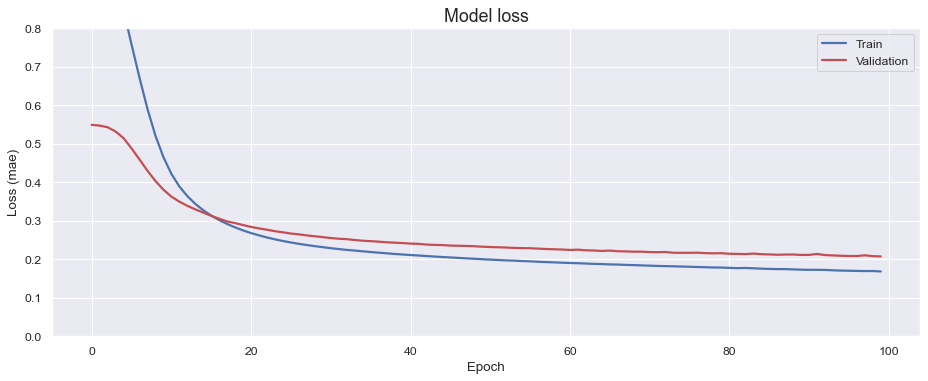

In [30]:
fig, ax = plt.subplots(figsize=(14, 5), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim([0, 0.8])
ax.legend(loc='upper right')
#plt.show()
"""
model.build(input_shape=(None, X_train_all.shape[1], X_train_all.shape[2]))
if not hasattr(model.layers[1], 'dense') or not model.layers[1].dense.built:
    print("Dense layer is not built.")
"""

585/585 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step
(18714, 30, 81)
Threshold for anomalies: 2.5017892718315102


NameError: name 'LAST_EPOCH' is not defined

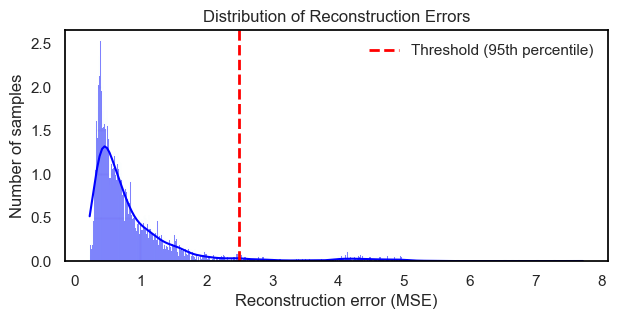

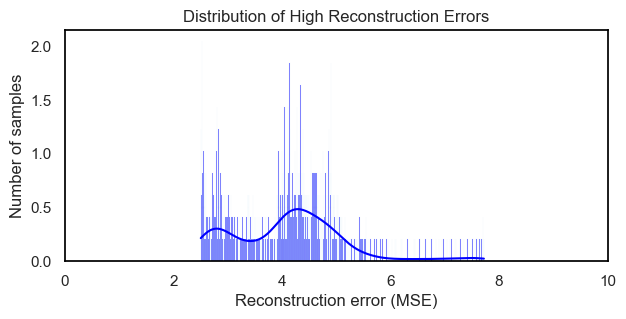

In [13]:
from keras.models import load_model
from keras import config

config.enable_unsafe_deserialization()
tf.debugging.set_log_device_placement(True)

model = load_model('model1.keras', custom_objects={'FeatureSelector': FeatureSelector,
    'CustomLossWithBounds': CustomLossWithBounds,
    'FeatureAttention': FeatureAttention,
    'FeatureReassembler': FeatureReassembler
})

# plot the loss distribution of the training set
# Predict the reconstruction of the training set
X_pred = model.predict(X_train_all)
print(X_pred.shape)
#print(X_pred)

# Calculate mean squared error (MSE) loss for each sample
mse = np.mean(np.power(X_train_all - X_pred, 2), axis=(1, 2))
mse_train_all = np.mean(np.power(X_train_all - X_pred, 2), axis=1)
mse_detailed = np.mean(np.power(X_train_all - X_pred, 2), axis=2)

# Plotting the distribution of the reconstruction errors
plt.figure(figsize=(7, 3))
ax_hist = plt.gca()
sns.histplot(mse, bins=2000, kde=True, color='blue', edgecolor='skyblue', stat='density', ax=ax_hist)

ax_hist.set_title('Distribution of Reconstruction Errors')
ax_hist.set_xlabel('Reconstruction error (MSE)')
ax_hist.set_ylabel('Number of samples')
#ax_hist.set_xlim([0, 1])
ax_hist.set_facecolor('none')
plt.gcf().set_facecolor('none')
for spine in ax_hist.spines.values():
    spine.set_edgecolor('black')

threshold = np.percentile(mse, 95)  # 95th percentile
threshold_gr1 = np.percentile(mse_train_all[:, :6], 95)
threshold_gr2 = np.percentile(mse_train_all[:, 6:6+6], 95)
threshold_gr3 = np.percentile(mse_train_all[:, 12:12+6], 95)
threshold_gr4 = np.percentile(mse_train_all[:, 18:18+6], 95)
threshold_gr5 = np.percentile(mse_train_all[:, 24:24+6], 95)
threshold_gr6 = np.percentile(mse_train_all[:, 30:30+6], 95)
threshold_gr7 = np.percentile(mse_train_all[:, 44:53], 95)


print(f"Threshold for anomalies: {threshold}")
ax_hist.axvline(threshold, color='red', linestyle='dashed', linewidth=2)
threshold_legend = mlines.Line2D([], [], color='red', linestyle='dashed', linewidth=2, label='Threshold (95th percentile)')
legend=ax_hist.legend(handles=[threshold_legend], loc='upper right', bbox_to_anchor=(1, 1))
legend.get_frame().set_alpha(0)

plt.savefig('reconstruction_errors.svg', transparent=True, format='svg', bbox_inches='tight')

# Additional plot for errors above threshold
plt.figure(figsize=(7, 3))
ax_hist_high = plt.gca()
high_mse = mse[mse > threshold]
sns.histplot(high_mse, bins=1000, kde=True, color='blue', edgecolor='skyblue', stat='density', ax=ax_hist_high)

ax_hist_high.set_title('Distribution of High Reconstruction Errors')
ax_hist_high.set_xlabel('Reconstruction error (MSE)')
ax_hist_high.set_ylabel('Number of samples')
ax_hist_high.set_xlim([0, 10])
ax_hist_high.set_facecolor('none')
plt.gcf().set_facecolor('none')
for spine in ax_hist_high.spines.values():
    spine.set_edgecolor('black')

settings = [
    ("Data scaler", SCALER),
    ("Look back", WINDOW_SIZE),
    ("Training data offset (h)", TRAIN_OFFSET),
    ("Min. training data length (h)", MIN_TRAIN_LENGTH),
    ("RNN unit type", RNN_TYPE),
    ("L1 units", L1_UNITS),
    ("L2 units", L2_UNITS),
    ("L4 units", L4_UNITS),
    ("L5 units", L5_UNITS),
    ("L2 regulizer parameter", L2_REGULIZER),
    ("Adam learning rate", ADAM_LEARNINGRATE),
    ("Loss function", LOSS),
    ("Activation function", ACTIVATION_FUNCTION),
    ("Recurrent activation function", RECURRENT_ACTIVATION_FUNCTION),
    ("Number of epochs", N_EPOCHS),
    ("Batch size", BATCH_SIZE),
    ("Validation split", VALIDATION_SPLIT),
    ("Treshold (95 perc.)", threshold),
    ("Treshold gr. 1 (95 perc.)", threshold_gr1),
    ("Treshold gr. 2 (95 perc.)", threshold_gr2),
    ("Treshold gr. 3 (95 perc.)", threshold_gr3),
    ("Treshold gr. 4 (95 perc.)", threshold_gr4),
    ("Treshold gr. 5 (95 perc.)", threshold_gr5),
    ("Treshold gr. 6 (95 perc.)", threshold_gr6),
    ("Treshold gr. 7 (95 perc.)", threshold_gr7),
    ("Bound penalty", PENALTY),
    ("Attention layer", ATTENTION),
    ("Attention layer activation function", ATTENTION_ACTIVATION),
    ("Last training epoch", LAST_EPOCH)
]

def show_settings(settings, start_dates, stop_dates):
    for name, value in settings:
        print(f"{name}: {value}")
    config_df = pd.DataFrame(settings, columns=['Parameter', 'Value'])
    
    dates_df = pd.DataFrame({
        'Parameter': [''] + ['Training data'] + ['Start date'] + start_dates,
        'Value': [''] + [''] + ['End date'] + stop_dates
    })
    
    # Concatenate the settings DataFrame with the dates DataFrame
    final_df = pd.concat([config_df, dates_df], ignore_index=True)
    final_df.to_csv('configuration_settings.csv', index=False)
    return final_df  # Return the DataFrame in case you want to use it later

# Call the function with your settings, start_dates, and stop_dates
final_settings_df = show_settings(settings, start_dates, end_dates)
#final_settings_df

## Test

881/881 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step
(28177, 30, 81)
881/881 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - loss: 1.9118
Test Loss: 0.9192166924476624
(28177, 30) (28177,)
28177
44.45909194946291
55.25553436279292
60.864605712890615
65.15531494140623


"\nfig, ax = plt.subplots(figsize=(14, 6), dpi=80)\nax.plot(mse_test, 'b', label='Train', linewidth=2)\nax.set_ylim(0, 1)\nax.set_ylabel('Loss (mae)')\n#test_dates\n"

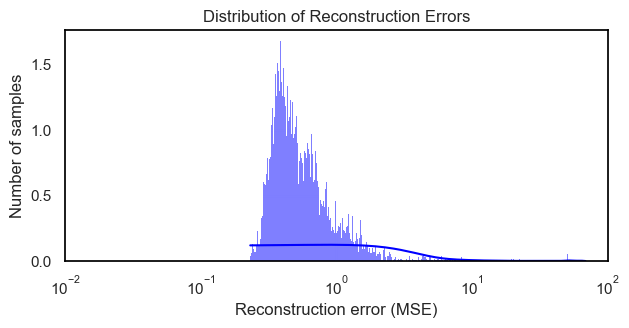

In [16]:
X_pred_test = model.predict(X_test_all)
print(X_pred_test.shape)
test_metrics = model.evaluate(X_test_all, X_test_all, verbose=1)
print("Test Loss:", test_metrics)

# Calculate mean squared error (MSE) loss for each sample
mse_test_all = np.power(X_test_all - X_pred_test,2)
mse_test = np.mean(np.power(X_test_all - X_pred_test, 2), axis=(1, 2))
mse_test_detailed = np.mean(np.power(X_test_all - X_pred_test, 2), axis=2)

print(mse_test_detailed.shape,mse_test.shape)
print(len(X_test_all))

print(np.percentile(mse_test, 90))
print(np.percentile(mse_test, 95))
print(np.percentile(mse_test, 97))
print(np.percentile(mse_test, 99))

plt.figure(figsize=(7, 3))
ax_hist = plt.gca()
sns.histplot(mse_test, bins=20000, kde=True, color='blue', edgecolor='skyblue', stat='density', ax=ax_hist)
ax_hist.set_xscale('log')
ax_hist.set_title('Distribution of Reconstruction Errors')
ax_hist.set_xlabel('Reconstruction error (MSE)')
ax_hist.set_ylabel('Number of samples')
ax_hist.set_xlim([0.01, 100])
ax_hist.set_facecolor('none')
plt.gcf().set_facecolor('none')
for spine in ax_hist.spines.values():
    spine.set_edgecolor('black')

"""
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(mse_test, 'b', label='Train', linewidth=2)
ax.set_ylim(0, 1)
ax.set_ylabel('Loss (mae)')
#test_dates
"""

## Postprocessing and exporting the results

(28177,)
The combined data has been successfully saved to 'Results.csv'.


<Figure size 1200x600 with 0 Axes>

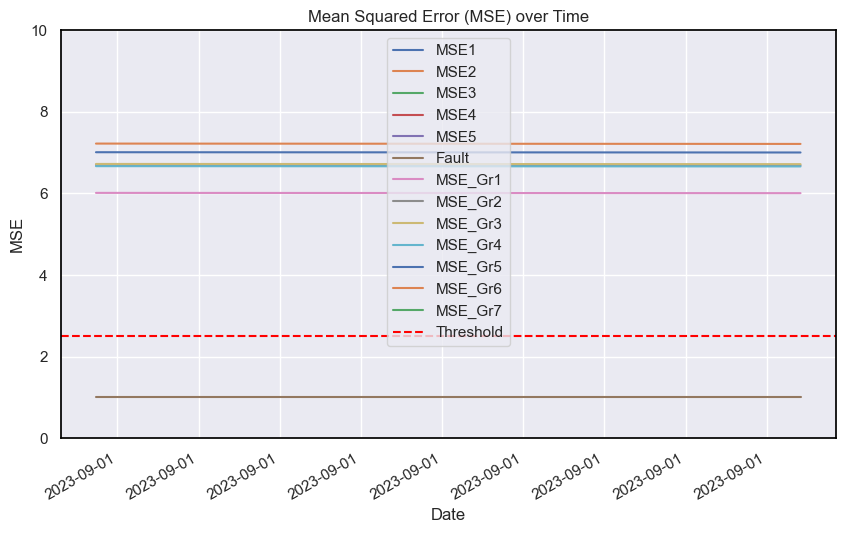

In [17]:
def latest_timestep(data):
    # Assumes data shape is (Batchsize, Timestep, Features)
    # Separate continuous and categorical data
    data_cont = data[:, -1, :-(BINARY_VARS)]  # Select the latest timestep of continuous features
    data_category = data[:, -1, -(BINARY_VARS):]  # Select the latest timestep of categorical features
    data_cont = sc_X.inverse_transform(data_cont)
    data_total = np.concatenate([data_cont, data_category], axis=1)
    return data_total

def average_timesteps(data):
    # Assumes data shape is (Batchsize, Timestep, Features)
    return sc_X.inverse_transform(data.mean(axis=1))

def weighted_average_timesteps(data):
    # Example: Use a weighted average or any statistical measure
    weights = np.linspace(1, 5, num=data.shape[1])  # Increasing weight with each timestep
    return sc_X.inverse_transform(np.average(data, axis=1, weights=weights))

full_length = len(all_test_dates) + WINDOW_SIZE - 1  # Total number of timesteps covered by all windows
num_features = X_pred_test.shape[2]
expanded_predictions = np.zeros((full_length, num_features))
mse_test_all2 = np.zeros((full_length, num_features))
count_occurrences = np.zeros((full_length, num_features))

for i in range(len(all_test_dates)):
    start_index = i
    end_index = start_index + WINDOW_SIZE
    expanded_predictions[start_index:end_index] += X_pred_test[i]
    mse_test_all2[start_index:end_index] += mse_test_all[i]
    count_occurrences[start_index:end_index] += 1

# Compute the mean by dividing predictions by the number of occurrences
mean_predictions = expanded_predictions / count_occurrences
mean_mse_test_all = mse_test_all2 / count_occurrences
"""
mean_mse_gr1 = np.mean(mean_mse_test_all[:len(all_test_dates), :6], axis=1)
mean_mse_gr2 = np.mean(mean_mse_test_all[:len(all_test_dates), 6:6+6], axis=1)
mean_mse_gr3 = np.mean(mean_mse_test_all[:len(all_test_dates), 12:12+6], axis=1)
mean_mse_gr4 = np.mean(mean_mse_test_all[:len(all_test_dates), 18:18+6], axis=1)
mean_mse_gr5 = np.mean(mean_mse_test_all[:len(all_test_dates), 24:24+6], axis=1)
mean_mse_gr6 = np.mean(mean_mse_test_all[:len(all_test_dates), 30:30+6], axis=1)
mean_mse_gr7 = np.mean(mean_mse_test_all[:len(all_test_dates), 44:53], axis=1)
print(mean_mse_test_all.shape)
"""
mean_mse_gr1 = np.mean(mse_test_all[:,:, :6],axis=(1, 2))
mean_mse_gr2 = np.mean(mse_test_all[:,:, 6:6+6],axis=(1, 2))
mean_mse_gr3 = np.mean(mse_test_all[:,:, 12:12+6],axis=(1, 2))
mean_mse_gr4 = np.mean(mse_test_all[:,:, 18:18+6],axis=(1, 2))
mean_mse_gr5 = np.mean(mse_test_all[:,:, 24:24+6],axis=(1, 2))
mean_mse_gr6 = np.mean(mse_test_all[:,:, 30:30+6],axis=(1, 2))
mean_mse_gr7 = np.mean(mse_test_all[:,:, 44:53],axis=(1, 2))
print(mean_mse_gr1.shape)

#mean_predictions = sc_X.inverse_transform(mean_predictions[:len(all_test_dates)])
mean_predictions = latest_timestep(X_pred_test)

mean_prediction_df = pd.DataFrame(mean_predictions, columns=[header_names[i] for i in range(num_features)], index=all_test_dates)

mse_test1 = np.mean(mse_test_all[:, -1, :],axis=1)
mse_test2 = np.mean(mse_test_all[:, 0, :],axis=1)
mse_test3 = np.mean(mse_test_all,axis=(1, 2))
mse_test4 = np.average(np.mean(mse_test_all,axis=2), axis=1, weights=np.linspace(1, 5, num=mse_test_all.shape[1]))
mse_test5 = np.mean(mean_mse_test_all[:len(all_test_dates)],axis=1)

mse_df = pd.DataFrame(mse_test1, index=all_test_dates, columns=['MSE1'])
mse_df['MSE2'] = mse_test2
mse_df['MSE3'] = mse_test3
mse_df['MSE4'] = mse_test4
mse_df['MSE5'] = mse_test5
mse_df['Fault'] = (mse_df['MSE1'] > threshold).astype(int)
mse_df['MSE_Gr1'] = mean_mse_gr1
mse_df['MSE_Gr2'] = mean_mse_gr2
mse_df['MSE_Gr3'] = mean_mse_gr3
mse_df['MSE_Gr4'] = mean_mse_gr4
mse_df['MSE_Gr5'] = mean_mse_gr5
mse_df['MSE_Gr6'] = mean_mse_gr6
mse_df['MSE_Gr7'] = mean_mse_gr7
results_df = pd.concat([mean_prediction_df, mse_df], axis=1)
results_df.to_csv('Results.csv', header=True, index_label='Timestamp', float_format='%.5f')

print("The combined data has been successfully saved to 'Results.csv'.")

from matplotlib.dates import date2num, DateFormatter

plt.figure(figsize=(12, 6), facecolor='none')
mse_df[:2].plot(marker='', figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE) over Time')
plt.ylim(0, 10)
for spine in plt.gca().spines.values():
    spine.set_color('black')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=10)) 
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold')
plt.legend()


## Clustering of errors

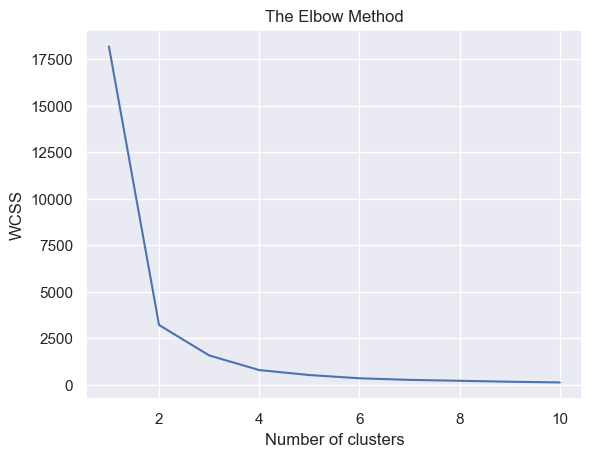

[0 0 0 ... 0 0 0]
Silhouette Score: 0.943
Davies-Bouldin Index: 0.414
Calinski-Harabasz Index: 95477.347
Silhouette Score: 0.946
Davies-Bouldin Index: 0.395
Calinski-Harabasz Index: 89179.883
Silhouette Score: 0.254
Davies-Bouldin Index: 1.944
Calinski-Harabasz Index: 199.321


In [18]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import hdbscan

def evaluate_clustering(data, cluster_labels):
    """
    Returns:
    dict: A dictionary containing the computed metrics.
    """
    metrics = {}
    metrics['Silhouette Score'] = silhouette_score(data, cluster_labels)
    metrics['Davies-Bouldin Index'] = davies_bouldin_score(data, cluster_labels)
    metrics['Calinski-Harabasz Index'] = calinski_harabasz_score(data, cluster_labels)
    for metric, value in metrics.items():
        print(f"{metric}: {value:.3f}")
    return metrics

offset = 10000
sc_MSE = StandardScaler()
scaled_MSE = sc_MSE.fit_transform(mse_test3[offset:len(all_test_dates)].reshape(-1, 1))

#Elbow method to find opt number of clusters for kmeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    kmeans.fit(scaled_MSE)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


"""
Check the performance of Hierarchical clustering
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(scaled_MSE, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()
"""

#Kmeans
n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(scaled_MSE)


#Hiearchical
hc = AgglomerativeClustering(n_clusters = n_clusters, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(scaled_MSE)


#(H)DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_DBSCAN = dbscan.fit_predict(scaled_MSE)
HDBSCAN_clusterer = hdbscan.HDBSCAN(min_cluster_size=round(0.002*len(scaled_MSE)), min_samples=round(0.001*len(scaled_MSE)), gen_min_span_tree=True)
y_HDBSCAN = HDBSCAN_clusterer.fit_predict(scaled_MSE)
#HDBSCAN_clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
"""
#Evaluate clustering
results_kmeans = evaluate_clustering(scaled_MSE, y_kmeans)
results_h = evaluate_clustering(scaled_MSE, y_hc)
results_DBSCAN = evaluate_clustering(scaled_MSE, y_HDBSCAN)
"""

print(y_kmeans)
results_kmeans = evaluate_clustering(scaled_MSE, y_kmeans)
results_h = evaluate_clustering(scaled_MSE, y_hc)
results_DBSCAN = evaluate_clustering(scaled_MSE, y_HDBSCAN)

cluster_labels_df = pd.DataFrame(index=all_test_dates, columns=['Clusters'])
cluster_labels_df['Clusters'] = -1
cluster_labels_df.iloc[offset:] = y_kmeans.reshape(-1, 1)
#cluster_labels_df = pd.DataFrame(y_kmeans, index=all_test_dates[offset:], columns=['Clusters'])
results_df_cl = pd.concat([results_df, cluster_labels_df], axis=1)
results_df_cl.to_csv('Results.csv', header=True, index_label='Timestamp', float_format='%.5f')
#results_df

## Google Colab import

In [23]:
import tensorflow as tf
print(tf.__version__)
import os
import pandas as pd
import numpy as np
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector, Layer, Activation, Permute, Multiply, Lambda, Concatenate, GRU
from keras.models import Model
from tensorflow.keras.utils import get_custom_objects
from keras import backend as K
from tensorflow.keras.losses import Loss
from keras import regularizers
from numpy.random import seed
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras_self_attention import SeqSelfAttention
from keras.models import load_model
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

model = load_model('model1.keras', custom_objects={'FeatureSelector': FeatureSelector,
    'CustomLossWithBounds': CustomLossWithBounds,
    'FeatureAttention': FeatureAttention,
    'FeatureReassembler': FeatureReassembler
})

X_pred_test = model.predict(X_test_all)

mse_test_all = np.power(X_test_all - X_pred_test,2)
mse_test = np.mean(np.power(X_test_all - X_pred_test, 2), axis=(1, 2))
mse_test_detailed = np.mean(np.power(X_test_all - X_pred_test, 2), axis=2)

mse_test1 = np.mean(mse_test_all[:, -1, :],axis=1)
mse_test2 = np.mean(mse_test_all[:, 0, :],axis=1)
mse_test3 = np.mean(mse_test_all,axis=(1, 2))
mse_test4 = np.average(np.mean(mse_test_all,axis=2), axis=1, weights=np.linspace(1, 5, num=mse_test_all.shape[1]))
mse_test5 = np.mean(mean_mse_test_all[:len(all_test_dates)],axis=1)

mse_df = pd.DataFrame(mse_test1, index=all_test_dates, columns=['MSE1'])
mse_df['MSE2'] = mse_test2
mse_df['MSE3'] = mse_test3
mse_df['MSE4'] = mse_test4
mse_df['MSE5'] = mse_test5
mse_df['Fault'] = (mse_df['MSE1'] > threshold).astype(int)
mse_df['MSE_Gr1'] = mean_mse_gr1
mse_df['MSE_Gr2'] = mean_mse_gr2
mse_df['MSE_Gr3'] = mean_mse_gr3
mse_df['MSE_Gr4'] = mean_mse_gr4
mse_df['MSE_Gr5'] = mean_mse_gr5
mse_df['MSE_Gr6'] = mean_mse_gr6
mse_df['MSE_Gr7'] = mean_mse_gr7
results_df = pd.concat([mean_prediction_df, mse_df], axis=1)
results_df.to_csv('Results.csv', header=True, index_label='Timestamp', float_format='%.5f')

print("The combined data has been successfully saved to 'Results.csv'.")

offset = 10000
sc_MSE = StandardScaler()
scaled_MSE = sc_MSE.fit_transform(mse_test3[offset:len(all_test_dates)].reshape(-1, 1))
n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(scaled_MSE)

cluster_labels_df = pd.DataFrame(index=all_test_dates, columns=['Clusters'])
cluster_labels_df['Clusters'] = -1
cluster_labels_df.iloc[offset:] = y_kmeans.reshape(-1, 1)

results_df_cl = pd.concat([results_df, cluster_labels_df], axis=1)
results_df_cl.to_csv('Results.csv', header=True, index_label='Timestamp', float_format='%.5f')

2.16.1
881/881 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step
The combined data has been successfully saved to 'Results.csv'.
